# Convolution

In [1]:
restoredefaultpath
set(0,'defaultlinelinewidth',1)
set(0,'defaultaxesfontsize',6)

In [2]:
%plot -s 800,400 -r 160 -f png

## Moving averages

The following grabs and plots the closing price of Bitcoin for the last 31 days.

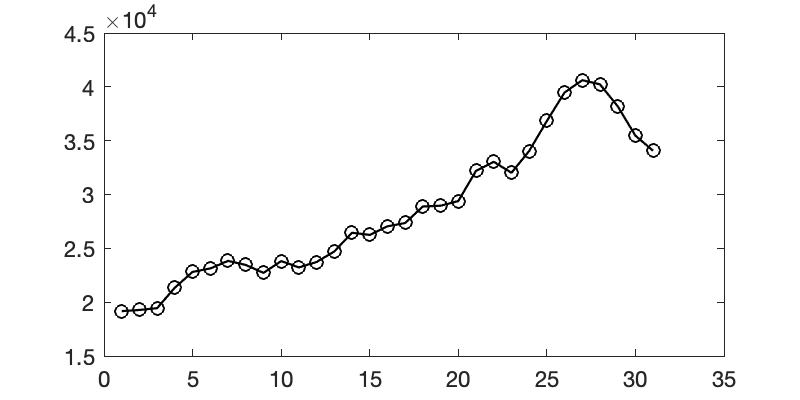

In [3]:
bc = webread('https://api.coindesk.com/v1/bpi/historical/close.json');
data = jsondecode(bc);
v = struct2cell(data.bpi);
v = cat(1,v{:});
plot(v,'-ko')

It's a noisy curve. We can smooth that out by taking 4-day moving averages, for example. There are slick ways to do that, but here is brute force.

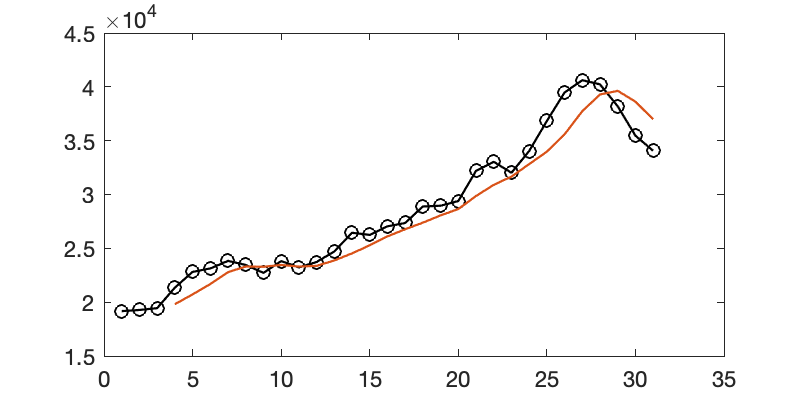

In [4]:
plot(v,'-ko')
for i = 4:31
    z(i) = (v(i) + v(i-1) + v(i-2) + v(i-3)) / 4;
end
z(1:3) = NaN;  % not a number
hold on
plot(z)

We might decide, however, to weight the most recent values more heavily. Here's how this might look.

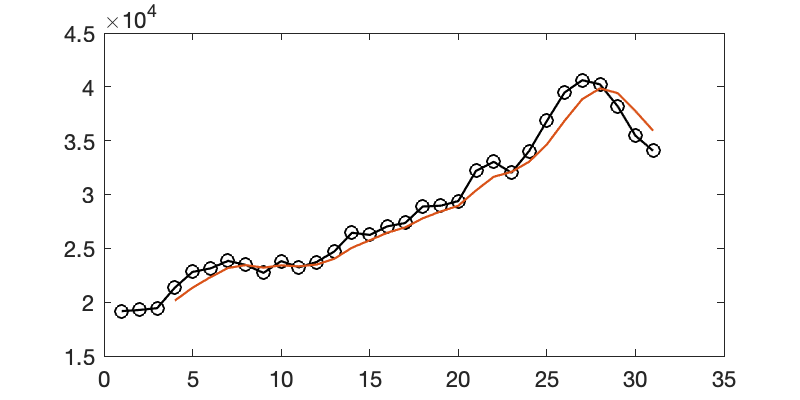

In [5]:
plot(v,'-ko')
w = [4 3 2 1];
for i = 4:31
    z(i) = (w(1)*v(i) + w(2)*v(i-1) + w(3)*v(i-2) + w(4)*v(i-3)) / sum(w);
end
z(1:3) = NaN;  % not a number
hold on
plot(z)

Note that each new value $z_i$ is a linear combination of the elements of $v$, weighted by the values in $w$. And we always go forward 1,2,3,4 in $w$, while on $v$ we have a sliding window going backward: $i,i-1,i-2,i-3$. Put concisely, the indices of $v$ and $w$ for each term in the sum add up to $i+1$, which indexes $z$.

## Convolution integral

The moving average above gave us a certain way to multiply together vectors $v$ and $w$ to get a new vector $z$:

```{math}
z_i =  \sum_{j} w_j v_{i-j} 
```

(although I reindexed the output vector from $i+1$ to $i$ compared to the computer code). This is analogous to a particular way to multiply two *functions*.

````{proof:definition} Convolution integral
```{math} 
[f*g](t) = \int_0^t f(t-\tau)g(\tau)\, d\tau
```
````

This too is a weighted average, with the values of $g(\tau)$ being multiplied against different windows of the function $f$ extending backward, such that the arguments of $f$ and $g$ sum to $t$, which is the argument of the result function.

An interesting fact is that while I presented $f*g$ as $g$ acting on $f$, in fact the operation is symmetric:

\begin{align*}
[g*f](t) & = \int_0^t f(t-\tau)g(\tau)\, d\tau\\
& = \int_t^0 f(u)g(t-u)\, (-du)  \\
& = \int_0^t g(t-u)f(u)\, du = [f*g](t)
\end{align*}.

We can also easily prove some other properties we really like to have with multiplication:

````{proof:property} Convolution
For functions $f$, $g$ and $h$, all defined for $t>0$, 

\begin{align*}
f*g &= g*f, \\
f * ( g * h ) &= ( f * g) * h, \\
f * (g+h) &= (f * g)+(f*h),\\ 
f * 0 &=0, \\ 
f*\delta &= f,
\end{align*}

where $0$ represents the zero function, and $\delta$ is an impulse.
````

```{note}
The last property above may look odd, as we have not discussed impulses in the context of integrals. The property can be confirmed in detail by using the "spike function" $\delta_\epsilon$ in {eq}`steps-spike` and taking the limit of $f*\delta_\epsilon$ as $\epsilon\to 0$.
```

In particular, if we regard convolution as a sort of multiplication, then the identity element is the impulse $\delta$.

````{warning}
It is *not* true that $f*1=f$, unless $f$ is the zero function. A consequence of the next theorem is that the identity for convolution is $\delta(t)$. 
````

## Convolution theorem

Convolution is intimately connected to Laplace transforms.

````{proof:theorem} Convolution Theorem
Suppose $\lx[f] = F(s)$, $\lx[g] = G(s)$, $h=f*g$, and $\lx[h] = H(s)$. Then $H(s)=F(s)G(s)$.
````

In words, convolution in time is equivalent to multiplication in transform space.

We now extend some definitions we applied earlier to first-order ODEs.

````{proof:definition} Impulse response, 2nd order
Suppose $\mathcal{A}[x]=x''+bx'+cx$ is a linear, 2nd-order operator. Define $\delta_\epsilon(t)$ as in {eq}`steps-spike`. Let $x_\epsilon(t)$ be the solution of $\opA[x]=\delta_\epsilon$, $x(0)=x'(0)=0$. Then the {term}`impulse response` of the linear operator is the function

```{math}
\lim_{\epsilon \to 0} x_\epsilon(t).
```
````

````{proof:definition} Transfer function, 2nd order
For the second-order linear operator $\opA[x]=x''+bx'+cx$ with constants $b$ and $c$, the function $\dfrac{1}{s^2+bs+c}$ is called the {term}`transfer function` of the operator.
````

```{note}
The transfer function is the reciprocal of the characteristic polynomial, and its poles are the characteristic values of the ODE.
```

All of these ideas come together. The impulse response is the solution of $\opA[x]=\delta$ with zero initial conditions. Taking transforms gives

$$
s^2 X(s) + b s X(s) + c X(s) = 1,
$$

which means that $X(s)$ is the transfer function.

```{proof:theorem}
The impulse response of a linear constant-coefficient equation is the inverse Laplace transform of the transfer function.
```

Now consider $\opA[x]=f$, again with zero initial conditions. Transforms imply that

$$
X(s) = \frac{F(s)}{s^2+b s+c} = F(s)G(s),
$$

where $G(s)$ is the transfer function. Thus $x=f*g$ by the convolution theorem.

```{proof:theorem}
The solution $\opA[x]=f$ with zero initial conditions is the convolution of $f$ with the impulse response.
```

::::{admonition} Example
:class: tip
Find the general solution of $x''+36x=\sin(t)$.

:::{dropdown} Example
Note that the homogeneous solution is $R\cos(6t+\theta)$, using amplitude-phase form. The transfer function is $G(s)=1/(s^2+36)$, and the impulse response is therefore

$$
g(t) = \frac{1}{6} \sin(6t).
$$

Hence a particular solution is $f*g$, i.e.,

\begin{align*}
x_p(t) &= \frac{1}{6}\int_0^t \sin(6(t-\tau))\sin(\tau) \,d\tau \\
&= \frac{1}{6}\int_0^t \sin(6t)\cos(6\tau)\sin(\tau) \,d\tau - \frac{1}{6}\int_0^t \cos(6t)\sin(6\tau)\sin(\tau) \,d\tau \\ 
&= \frac{1}{6}\sin(6t) \int_0^t \cos(6\tau)\sin(\tau) \,d\tau - \frac{1}{6}\cos(6t) \int_0^t \sin(6\tau)\sin(\tau) \,d\tau.
\end{align*}

The integrals yield to standard trig tricks, if you care to finish them.
:::
::::

In the end, we can avoid Laplace transforms altogether! 

The impulse response is equivalent to the solution of $\opA[x]=0$ with $x(0)=0$, $x'(0)=1$, which is a homogeneous problem we can readily solve. Then a particular solution of $\opA[x]=f$ is only a convolution integral away — although admittedly, the integral might be daunting. It turns out that this process is equivalent to a 2nd-order version of the method of [variation of parameters](../first_linear/variation_parameters.md). 

For linear problems, all roads lead to the same destination.

<div style="max-width:608px"><div style="position:relative;padding-bottom:66.118421052632%"><iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_grp10i0b&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_pyep6wqm" width="608" height="402" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player" style="position:absolute;top:0;left:0;width:100%;height:100%"></iframe></div></div>